# Initial examples (Supervised Learning)


> *A regression model provides a function that describes the relationship between **one or more independent variables** and a **response, dependent, or target variable**.*

- Input variables (X, attributes, features, variables)
- Output **target** variable (*y*, target, label)

## The goal is to find a function *f* that fulfills: ***y = f(X)***

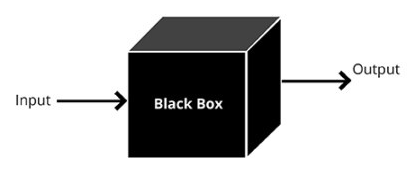

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

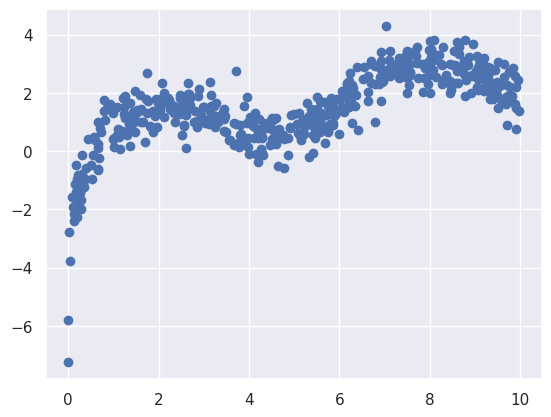

In [2]:
rng = np.random.RandomState(1)
N = 500
x = 10 * rng.rand(N)

y = np.sin(x) + np.log(x) + (0.5 * rng.randn(N))   # SECRET FUNCTION

plt.scatter(x, y)

### Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
X = x.reshape(-1, 1)
model.fit(X, y)

LinearRegression()

Model slope:     0.31564158105032164
Model intercept: -0.11959077517355077


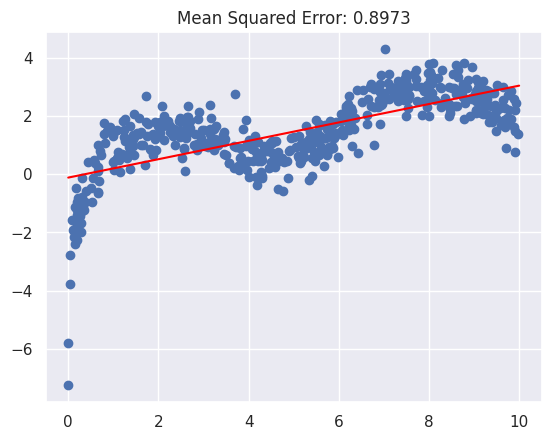

In [30]:
xfit = np.linspace(0, 10, 1000).reshape(-1,1)
yfit = model.predict(xfit)

plt.scatter(x, y)
plt.plot(xfit, yfit, color='red');
plt.title(f'Mean Squared Error: {((y-model.predict(X))**2).mean():.4f}')

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

plt.show()

The idea is to take our multidimensional linear model:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(15, include_bias=False)
Xp = poly.fit_transform(x[:, None])
model = LinearRegression(fit_intercept=True)
model.fit(Xp, y)
print(list(zip(x[:3], y[:3])))

[(4.17022004702574, 0.5133846726650334), (7.203244934421581, 2.682439867506417), (0.0011437481734488664, -7.239258118249586)]


y = -3.10 + 5.846·x**1 + 0.757·x**2 + -2.308·x**3 + -1.683·x**4 + 1.318·x**5 + 1.501·x**6 + -2.047·x**7 + 1.079·x**8 + -0.331·x**9 + 0.066·x**10 + -0.009·x**11 + 0.001·x**12 + -0.000·x**13 + 0.000·x**14 + -0.000·x**15


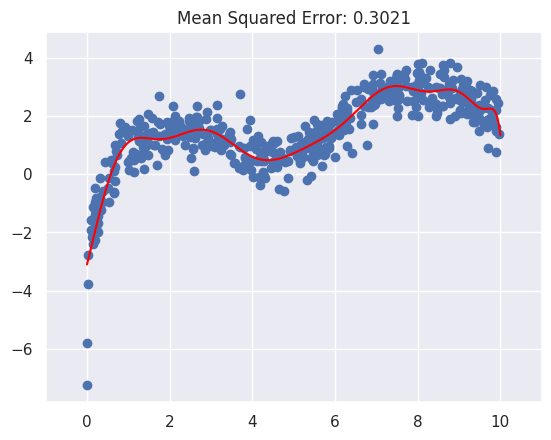

In [33]:
xfit = np.linspace(0, 10, 1000).reshape(-1,1)
xfit_p = poly.transform(xfit)
yfit = model.predict(xfit_p)

plt.scatter(x, y)
plt.plot(xfit, yfit, color='red');
plt.title(f'Mean Squared Error: {((y-model.predict(Xp))**2).mean():.4f}')
plt.xlim(left=-1, right=11)
print('y =',  ' + '.join([f'{model.intercept_:.2f}'] + [f'{c:.3f}·x**{i+1}' for i, c  in enumerate(model.coef_)] ))

### Control overfitting

### Ridge Regression ($L_2 Regularization$)
$L_2$ *regularization*, sometimes also called *Tikhonov regularization*.
This proceeds by penalizing the sum of squares (2-norms) of the model coefficients; in this case, the penalty on the model fit would be 
$$
P = \alpha\sum_{n=1}^N \theta_n^2
$$

In [34]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=2.0)
model.fit(Xp, y)

Ridge(alpha=2.0)

y = ['2.61 x**0 +', '0.71 x**1 +', '-0.30 x**2 +', '-0.47 x**3 +', '0.01 x**4 +', '0.27 x**5 +', '-0.16 x**6 +', '0.03 x**7 +', '-0.00 x**8 +', '-0.00 x**9 +', '0.00 x**10 +', '-0.00 x**11 +', '0.00 x**12 +', '-0.00 x**13 +', '0.00 x**14 +']


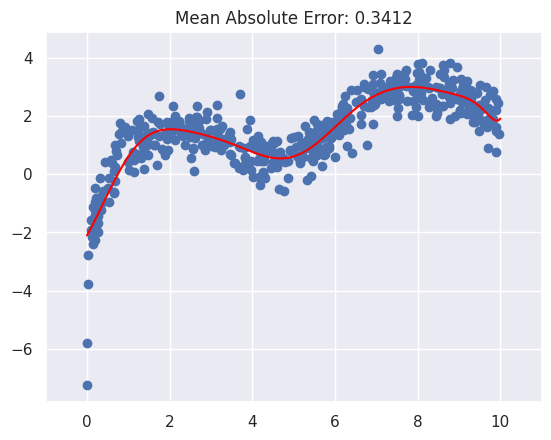

In [35]:
xfit = np.linspace(0, 10, 1000).reshape(-1,1)
xfit_p = poly.transform(xfit)
yfit = model.predict(xfit_p)
plt.scatter(x, y)
plt.plot(xfit, yfit, color='red');
plt.title(f'Mean Absolute Error: {((y-model.predict(Xp))**2).mean():.4f}')
plt.xlim(left=-1, right=11)
print('y =',  [f'{c:.2f} x**{i} +' for i, c  in enumerate(model.coef_)] )

### Neural Networks

In [36]:
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=(1,)),
    keras.layers.Dense(8, activation="relu"),
    keras.layers.Dense(1, activation="linear"),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer=keras.optimizers.Adam(0.005), 
              loss="mse", metrics=['mse'],)
model.fit(X,y, batch_size=32, epochs=500,)

Epoch 1/500
16/16 [==============================] - 1s 3ms/step - loss: 1.0237 - mse: 1.0237
Epoch 2/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9359 - mse: 0.9359
Epoch 3/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9073 - mse: 0.9073
Epoch 4/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8996 - mse: 0.8996
Epoch 5/500
16/16 [==============================] - 0s 2ms/step - loss: 0.9022 - mse: 0.9022
Epoch 6/500
16/16 [==============================] - 0s 3ms/step - loss: 0.9073 - mse: 0.9073
Epoch 7/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8972 - mse: 0.8972
Epoch 8/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8965 - mse: 0.8965
Epoch 9/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8952 - mse: 0.8952
Epoch 10/500
16/16 [==============================] - 0s 2ms/step - loss: 0.8939 - mse: 0.8939
Epoch 11/500
16/16 [==============================] - 0s 2m

16/16 [==============================] - 0s 1ms/step


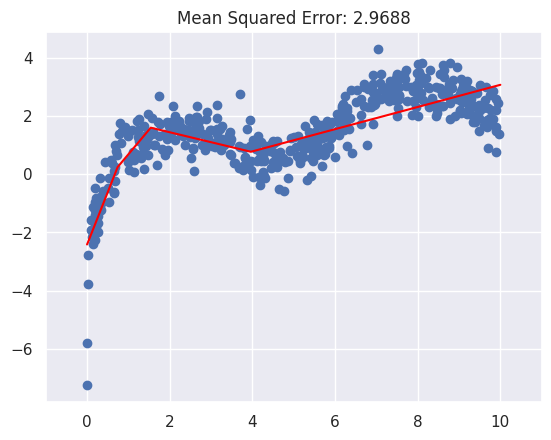

In [38]:
xfit = np.linspace(0, 10, 1000).reshape(-1,1)
yfit = model.predict(xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit, color='red');
plt.title(f'Mean Squared Error: {((y-model.predict(X).squeeze())**2).mean():.4f}')
plt.xlim(left=-1, right=11);

## Neural Networks + Polynomial features

In [39]:
poly = PolynomialFeatures(3, include_bias=False)
Xp = poly.fit_transform(X)

model = keras.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=(3,)),
    keras.layers.Dense(8, activation="relu",),
    keras.layers.Dense(1, activation="linear"),
])

model.compile(optimizer=keras.optimizers.Adam(0.0025), 
              loss="mse", metrics=['mse']
              )
model.fit(Xp, y, batch_size=16, epochs=500)



Epoch 1/500
32/32 [==============================] - 1s 2ms/step - loss: 8001.0239 - mse: 8001.0239
Epoch 2/500
32/32 [==============================] - 0s 2ms/step - loss: 121.5755 - mse: 121.5755
Epoch 3/500
32/32 [==============================] - 0s 2ms/step - loss: 19.8383 - mse: 19.8383
Epoch 4/500
32/32 [==============================] - 0s 2ms/step - loss: 13.4767 - mse: 13.4767
Epoch 5/500
32/32 [==============================] - 0s 2ms/step - loss: 12.7285 - mse: 12.7285
Epoch 6/500
32/32 [==============================] - 0s 2ms/step - loss: 12.0472 - mse: 12.0472
Epoch 7/500
32/32 [==============================] - 0s 2ms/step - loss: 11.4534 - mse: 11.4534
Epoch 8/500
32/32 [==============================] - 0s 2ms/step - loss: 10.9147 - mse: 10.9147
Epoch 9/500
32/32 [==============================] - 0s 2ms/step - loss: 10.3142 - mse: 10.3142
Epoch 10/500
32/32 [==============================] - 0s 2ms/step - loss: 9.6343 - mse: 9.6343
Epoch 11/500
32/32 [===============

16/16 [==============================] - 0s 2ms/step


(-1.0, 11.0)

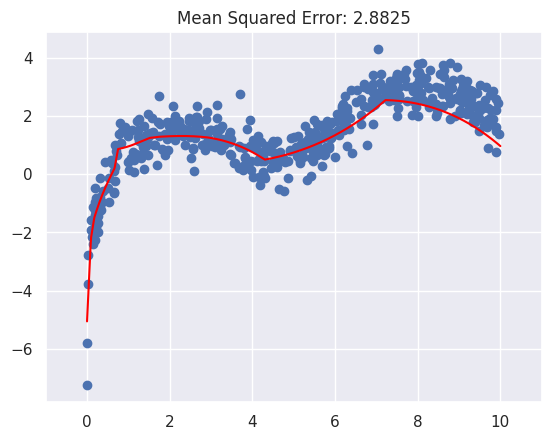

In [40]:
xfit = np.linspace(0, 10, 1000).reshape(-1,1)
xfit_p = poly.transform(xfit)
yfit = model.predict(xfit_p)
plt.scatter(x, y)
plt.plot(xfit, yfit, color='red');
plt.title(f'Mean Squared Error: {((y-model.predict(Xp).squeeze())**2).mean():.4f}')
plt.xlim(left=-1, right=11)